## unit 2 -פונקציות בסיסיות +מציאת עמודות/ערכים
## unit 3 - ערכים חסרים ומילוי ערכים חסרים 
## unit 4 - היסטוגרמות + גרופבי + בוקס פלוט
## unit 5 - קורולציות וסוגי קורלציות 
## unit 6 - בוקס פלוט והמשך קורולציות 
## unit 7 - פיווטיבל,פאי,עצי החלטה,חיזוי
## unit 8 - המשך מודלים דיוקים וכו'
## unit 9 - הצגות גרפיות לוג וכו'
#  :) מה ישלך הכל טוב תעשה קונטרול אף 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib as mpl

# Unit 2


In [2883]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
vacc_df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25626,Zimbabwe,ZWE,2021-06-05,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0
25627,Zimbabwe,ZWE,2021-06-06,1068107.0,687321.0,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0
25628,Zimbabwe,ZWE,2021-06-07,1073971.0,688696.0,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0
25629,Zimbabwe,ZWE,2021-06-08,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0


In [2884]:
type(vacc_df)

pandas.core.frame.DataFrame

view the shape of the dataframe:

נותן מספר שואות ועמודות

In [2885]:
vacc_df.shape

(25631, 12)

view basic information:

In [2886]:
vacc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25631 entries, 0 to 25630
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             25631 non-null  object 
 1   iso_code                             25631 non-null  object 
 2   date                                 25631 non-null  object 
 3   total_vaccinations                   15235 non-null  float64
 4   people_vaccinated                    14439 non-null  float64
 5   people_fully_vaccinated              11569 non-null  float64
 6   daily_vaccinations_raw               12927 non-null  float64
 7   daily_vaccinations                   25390 non-null  float64
 8   total_vaccinations_per_hundred       15235 non-null  float64
 9   people_vaccinated_per_hundred        14439 non-null  float64
 10  people_fully_vaccinated_per_hundred  11569 non-null  float64
 11  daily_vaccinations_per_milli

In [2887]:
vacc_df.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

View the first few rows:

In [2888]:
vacc_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [2889]:
vacc_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.523500e+04,1.443900e+04,1.156900e+04,1.292700e+04,2.539000e+04,15235.000000,14439.000000,11569.000000,25390.000000
mean,2.973408e+07,1.606089e+07,8.848017e+06,7.020018e+05,3.531145e+05,20.716681,14.031572,7.952261,3140.116227
std,1.297160e+08,6.218527e+07,3.419641e+07,2.784197e+06,1.906144e+06,27.862594,17.425931,12.006794,4427.211268
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.127575e+05,8.638750e+04,4.122000e+04,4.931000e+03,9.325000e+02,1.810000,1.525000,0.690000,347.250000
50%,8.933750e+05,6.401150e+05,3.459600e+05,2.640600e+04,7.789500e+03,9.050000,6.520000,3.110000,1625.000000
75%,5.381444e+06,3.772363e+06,2.103577e+06,1.564040e+05,4.622350e+04,28.565000,20.395000,9.920000,4532.000000
max,2.255071e+09,9.442351e+08,4.802594e+08,3.972108e+07,3.602509e+07,230.780000,116.110000,114.670000,118759.000000


A summary of the functions so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple
* `.head`, `.tail`


<a id='section3'></a>

---
## 3. Selecting data



#### The index of a dataframe doesn't have to be numeric
### יצירת דאטה 

In [2890]:
df = pd.DataFrame({'age':[30, 2, 12, 4, 32, 33, 69],
                   'color':['blue', 'green', 'red', 'white', 'gray', 'black', 'red'],
                   'food':['Steak', 'Lamb', 'Mango', 'Apple', 'Cheese', 'Melon', 'Beans'],
                   'height':[165, 70, 120, 80, 180, 172, 150],
                   'score':[4.6, 8.3, 9.0, 3.3, 1.8, 9.5, 2.2],
                   'state':['NY', 'TX', 'FL', 'AL', 'AK', 'TX', 'TX']
                   },
                  index=['Jane', 'Nick', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia'])
df

,age,color,food,height,score,state
Jane,30,blue,Steak,165,4.6,NY
Nick,2,green,Lamb,70,8.3,TX
Aaron,12,red,Mango,120,9.0,FL
Penelope,4,white,Apple,80,3.3,AL
Dean,32,gray,Cheese,180,1.8,AK
Christina,33,black,Melon,172,9.5,TX
Cornelia,69,red,Beans,150,2.2,TX


In our case it just happens to be numeric:

In [2891]:
vacc_df.location
#is the same as this:
vacc_df['location']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
25626       Zimbabwe
25627       Zimbabwe
25628       Zimbabwe
25629       Zimbabwe
25630       Zimbabwe
Name: location, Length: 25631, dtype: object

note: using the `.` notation is possible only for columns whose names do not contain spaces or special characters

what data type is vacc_df.location? (list? series? dataframe?)

In [2892]:
type(vacc_df.location)

pandas.core.series.Series

In [2893]:
#retrieve a specific cell
vacc_df.location[333]

'Albania'

In [2894]:
#retrieve two columns
vacc_df[['location','date']]

,location,date
0,Afghanistan,2021-02-22
1,Afghanistan,2021-02-23
2,Afghanistan,2021-02-24
3,Afghanistan,2021-02-25
4,Afghanistan,2021-02-26
...,...,...
25626,Zimbabwe,2021-06-05
25627,Zimbabwe,2021-06-06
25628,Zimbabwe,2021-06-07
25629,Zimbabwe,2021-06-08


#### Seletcting subsets of rows and columns

One way to do that is iloc. 

`.iloc` - selects subsets of rows and columns by integer location only

In [2895]:
#Rows:
vacc_df.iloc[0]  #first row
vacc_df.iloc[-1] #last row


location                                  Zimbabwe
iso_code                                       ZWE
date                                    2021-06-09
total_vaccinations                     1.08398e+06
people_vaccinated                           689920
people_fully_vaccinated                     394063
daily_vaccinations_raw                        5174
daily_vaccinations                            6253
total_vaccinations_per_hundred                7.29
people_vaccinated_per_hundred                 4.64
people_fully_vaccinated_per_hundred           2.65
daily_vaccinations_per_million                 421
Name: 25630, dtype: object

The : operator 

 - when used alone it means "everything"

- also used to indicate a ***slice*** of values


In [2896]:
vacc_df.iloc[1:2] # second and third row
vacc_df.iloc[[-1,2,22]] #a few specific rows

# Columns:
vacc_df.iloc[:,0] # first column of data frame  
vacc_df.iloc[:,1] # second column of data frame  
vacc_df.iloc[:,-1] # last column of data frame

#Rows and columns
vacc_df.iloc[0:5] # first five rows of dataframe
vacc_df.iloc[:, 0:2] # first two columns of data frame with all rows
vacc_df.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.

,location,people_fully_vaccinated,daily_vaccinations_raw
0,Afghanistan,NaN,NaN
3,Afghanistan,NaN,NaN
6,Afghanistan,NaN,NaN
24,Afghanistan,NaN,NaN


What if I want to select the 'daily_vaccinations' column, but I don't remember which column it is?

Use `.loc`

`.loc` - selects subsets of rows and columns by label only. Allowed inputs are:

- A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index, and never as an integer position along the index).

- A list or array of labels, e.g. ['a', 'b', 'c'].

- A slice object with labels, e.g. 'a':'f'.

In [2897]:
vacc_df.loc[:,'daily_vaccinations']

0           NaN
1        1367.0
2        1367.0
3        1367.0
4        1367.0
          ...  
25626    8498.0
25627    8019.0
25628    7699.0
25629    6790.0
25630    6253.0
Name: daily_vaccinations, Length: 25631, dtype: float64

I'm missing the location. Let's add it. 

In [2898]:
vacc_df.loc[:,['location','daily_vaccinations']]

#vacc_df.loc[0:4:,['location', 'total_vaccinations']]  this is to select specific rows

,location,daily_vaccinations
0,Afghanistan,NaN
1,Afghanistan,1367.0
2,Afghanistan,1367.0
3,Afghanistan,1367.0
4,Afghanistan,1367.0
...,...,...
25626,Zimbabwe,8498.0
25627,Zimbabwe,8019.0
25628,Zimbabwe,7699.0
25629,Zimbabwe,6790.0


Semantics are similar to iloc. But note:

- `iloc` excludes the last element.  `df.iloc[0:1000]` will return entries 0...999
- `loc`, includes the last element.  `df.loc[0:1000]` will return entries 0...1000

you try it! What is the difference between:

> vacc_df.iloc[0:5]

> vacc_df.loc[0:5]

---
A summary of the functions in this unit:

* `.iloc` - selects rows and columns by integer location
* `.loc` - selects rows and columns by label location



Note: indexing operators as the ones working on dictionaries, will also work in pandas. But for more advanced operations, better get used to loc and iloc.

---

<a id='section4'></a>

## 4. Conditional selection




In [2899]:
vacc_df.loc[:,'location'] 

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
25626       Zimbabwe
25627       Zimbabwe
25628       Zimbabwe
25629       Zimbabwe
25630       Zimbabwe
Name: location, Length: 25631, dtype: object

This creates a series of true/false 

We can insert this into data to select only that task:

Another way:

בחירה של ערך ספציפי בדאטה

In [2900]:
vacc_df.loc[vacc_df.location == 'Israel']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
11340,Israel,ISR,2020-12-19,60.0,60.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
11341,Israel,ISR,2020-12-20,7419.0,7419.0,NaN,7359.0,7359.0,0.09,0.09,NaN,850.0
11342,Israel,ISR,2020-12-21,32303.0,32303.0,NaN,24884.0,16122.0,0.37,0.37,NaN,1863.0
11343,Israel,ISR,2020-12-22,76915.0,76915.0,NaN,44612.0,25618.0,0.89,0.89,NaN,2960.0
11344,Israel,ISR,2020-12-23,139748.0,139748.0,NaN,62833.0,34922.0,1.61,1.61,NaN,4035.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11508,Israel,ISR,2021-06-05,10594142.0,5456323.0,5137819.0,166.0,2382.0,122.40,63.04,59.36,275.0
11509,Israel,ISR,2021-06-06,10599155.0,5460478.0,5138677.0,5013.0,2616.0,122.46,63.09,59.37,302.0
11510,Israel,ISR,2021-06-07,10604031.0,5464694.0,5139337.0,4876.0,2819.0,122.51,63.14,59.38,326.0
11511,Israel,ISR,2021-06-08,10608579.0,5468242.0,5140337.0,4548.0,3067.0,122.56,63.18,59.39,354.0


Select two countries:

In [2901]:
two_countries = vacc_df.loc[(vacc_df.location == 'Israel') | (vacc_df.location == 'Denmark')]
two_countries

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
5852,Denmark,DNK,2020-12-17,1.0,1.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
5853,Denmark,DNK,2020-12-18,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
5854,Denmark,DNK,2020-12-19,2.0,2.0,NaN,NaN,0.0,0.00,0.00,NaN,0.0
5855,Denmark,DNK,2020-12-20,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
5856,Denmark,DNK,2020-12-21,3.0,3.0,NaN,NaN,0.0,0.00,0.00,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11508,Israel,ISR,2021-06-05,10594142.0,5456323.0,5137819.0,166.0,2382.0,122.40,63.04,59.36,275.0
11509,Israel,ISR,2021-06-06,10599155.0,5460478.0,5138677.0,5013.0,2616.0,122.46,63.09,59.37,302.0
11510,Israel,ISR,2021-06-07,10604031.0,5464694.0,5139337.0,4876.0,2819.0,122.51,63.14,59.38,326.0
11511,Israel,ISR,2021-06-08,10608579.0,5468242.0,5140337.0,4548.0,3067.0,122.56,63.18,59.39,354.0


only the indexs of the tasks:

In [2902]:
two_countries.index.values

array([ 5852,  5853,  5854,  5855,  5856,  5857,  5858,  5859,  5860,
        5861,  5862,  5863,  5864,  5865,  5866,  5867,  5868,  5869,
        5870,  5871,  5872,  5873,  5874,  5875,  5876,  5877,  5878,
        5879,  5880,  5881,  5882,  5883,  5884,  5885,  5886,  5887,
        5888,  5889,  5890,  5891,  5892,  5893,  5894,  5895,  5896,
        5897,  5898,  5899,  5900,  5901,  5902,  5903,  5904,  5905,
        5906,  5907,  5908,  5909,  5910,  5911,  5912,  5913,  5914,
        5915,  5916,  5917,  5918,  5919,  5920,  5921,  5922,  5923,
        5924,  5925,  5926,  5927,  5928,  5929,  5930,  5931,  5932,
        5933,  5934,  5935,  5936,  5937,  5938,  5939,  5940,  5941,
        5942,  5943,  5944,  5945,  5946,  5947,  5948,  5949,  5950,
        5951,  5952,  5953,  5954,  5955,  5956,  5957,  5958,  5959,
        5960,  5961,  5962,  5963,  5964,  5965,  5966,  5967,  5968,
        5969,  5970,  5971,  5972,  5973,  5974,  5975,  5976,  5977,
        5978,  5979,

the index in the first place:

In [2903]:
two_countries.index.values[0]

5852

how many rows for the two countries?

In [2904]:
two_countries.count()

location                               347
iso_code                               347
date                                   347
total_vaccinations                     344
people_vaccinated                      344
people_fully_vaccinated                313
daily_vaccinations_raw                 339
daily_vaccinations                     345
total_vaccinations_per_hundred         344
people_vaccinated_per_hundred          344
people_fully_vaccinated_per_hundred    313
daily_vaccinations_per_million         345
dtype: int64

At the end of the file we have some world data.

Use str.contains if you're not sure how this location is called

In [2905]:
            
vacc_df[vacc_df['location'].str.contains('World')]             
             

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
25249,World,OWID_WRL,2020-12-02,0.000000e+00,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
25250,World,OWID_WRL,2020-12-03,0.000000e+00,0.0,NaN,0.0,0.0,0.00,0.00,NaN,0.0
25251,World,OWID_WRL,2020-12-04,0.000000e+00,0.0,NaN,0.0,0.0,0.00,0.00,NaN,0.0
25252,World,OWID_WRL,2020-12-05,0.000000e+00,0.0,NaN,0.0,0.0,0.00,0.00,NaN,0.0
25253,World,OWID_WRL,2020-12-06,0.000000e+00,0.0,NaN,0.0,0.0,0.00,0.00,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25434,World,OWID_WRL,2021-06-05,2.128430e+09,899839613.0,459688374.0,33706036.0,36025088.0,27.31,11.54,5.90,4622.0
25435,World,OWID_WRL,2021-06-06,2.159322e+09,911510608.0,464437567.0,30891688.0,35974465.0,27.70,11.69,5.96,4615.0
25436,World,OWID_WRL,2021-06-07,2.189777e+09,920879996.0,469364839.0,30454770.0,35142290.0,28.09,11.81,6.02,4508.0
25437,World,OWID_WRL,2021-06-08,2.222197e+09,932418666.0,475435576.0,32420469.0,34266525.0,28.51,11.96,6.10,4396.0


Remove the world data:

In [2906]:
vacc_df_noWorld = vacc_df.loc[vacc_df.location != 'World']
vacc_df_noWorld

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25626,Zimbabwe,ZWE,2021-06-05,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0
25627,Zimbabwe,ZWE,2021-06-06,1068107.0,687321.0,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0
25628,Zimbabwe,ZWE,2021-06-07,1073971.0,688696.0,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0
25629,Zimbabwe,ZWE,2021-06-08,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0


Find the country with the maximum vaccinations:

מוצא ערך מקסימלי

In [2907]:
max_vacc = vacc_df_noWorld.total_vaccinations.max()
max_vacc

1284738750.0

מוציא שורה עם ערך מקסימלי

In [2908]:
vacc_df_noWorld.loc[vacc_df_noWorld.total_vaccinations == max_vacc]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1479,Asia,OWID_ASI,2021-06-09,1.284739e+09,323938446.0,114673619.0,23803518.0,23830853.0,27.69,6.98,2.47,5136.0


What do you think this function does?

In [2909]:
vacc_df_noWorld.total_vaccinations.mean()

22742777.89883682

---
Summary of the functions in this unit:

* `.index.values` - the row indexes of this part of the dataframes
* `.str.contains` - selects rows and columns that contain a string
* `.max` - maximum value
* `.mean` - average value
* `.count` - the number of rows that contain a value

# Unit 3 - missing values
---

1. Find rows with missing values
2. Remove missing values using dropna()  
3. Fill missing values using fillna()
4. Fill missing values using interpolate()





In [2910]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)

<a id='section1'></a>

`null` / `na` - no value

`NaN` - **N**ot **a** **N**umber - the value is missing. This value will be ignored in calculations such as `.mean()`


### 1. Find rows with missing values

In [2911]:
vacc_df.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     10396
people_vaccinated                      11192
people_fully_vaccinated                14062
daily_vaccinations_raw                 12704
daily_vaccinations                       241
total_vaccinations_per_hundred         10396
people_vaccinated_per_hundred          11192
people_fully_vaccinated_per_hundred    14062
daily_vaccinations_per_million           241
dtype: int64

`isnull()` is a pandas function, so either use it on a dataframe or call it through pd

In [2912]:
pd.isnull(vacc_df).sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     10396
people_vaccinated                      11192
people_fully_vaccinated                14062
daily_vaccinations_raw                 12704
daily_vaccinations                       241
total_vaccinations_per_hundred         10396
people_vaccinated_per_hundred          11192
people_fully_vaccinated_per_hundred    14062
daily_vaccinations_per_million           241
dtype: int64

In [2913]:
vacc_df['daily_vaccinations'].notnull().sum()

25390

In [2914]:
vacc_df['daily_vaccinations'].isnull().sum()

241

`isnan` is a numpy function

In [2915]:
np.isnan(vacc_df['daily_vaccinations']).sum()

241

### 2. Remove missing values using dropna() 

Zimbabwe contains missing values

In [2916]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']
zimbabwe.head(10)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
25519,Zimbabwe,ZWE,2021-02-18,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
25520,Zimbabwe,ZWE,2021-02-19,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0
25521,Zimbabwe,ZWE,2021-02-20,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0
25522,Zimbabwe,ZWE,2021-02-21,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0
25523,Zimbabwe,ZWE,2021-02-22,1314.0,1314.0,NaN,NaN,328.0,0.01,0.01,NaN,22.0
25524,Zimbabwe,ZWE,2021-02-23,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0
25525,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0
25526,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0
25527,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0
25528,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0


In [2917]:
zimbabwe['total_vaccinations'].isnull().sum()

3

In [2918]:
zimbabwe[zimbabwe['total_vaccinations'].notnull()]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
25519,Zimbabwe,ZWE,2021-02-18,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
25523,Zimbabwe,ZWE,2021-02-22,1314.0,1314.0,NaN,NaN,328.0,0.01,0.01,NaN,22.0
25524,Zimbabwe,ZWE,2021-02-23,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0
25525,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0
25526,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25626,Zimbabwe,ZWE,2021-06-05,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0
25627,Zimbabwe,ZWE,2021-06-06,1068107.0,687321.0,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0
25628,Zimbabwe,ZWE,2021-06-07,1073971.0,688696.0,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0
25629,Zimbabwe,ZWE,2021-06-08,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0


We can see the difference between the number of values per row

In [2919]:
zimbabwe.count()

location                               112
iso_code                               112
date                                   112
total_vaccinations                     109
people_vaccinated                      109
people_fully_vaccinated                 80
daily_vaccinations_raw                 107
daily_vaccinations                     111
total_vaccinations_per_hundred         109
people_vaccinated_per_hundred          109
people_fully_vaccinated_per_hundred     80
daily_vaccinations_per_million         111
dtype: int64

Remove all values for a specific column

In [2920]:
zimbabwe.dropna(subset = ['total_vaccinations']).count()

location                               109
iso_code                               109
date                                   109
total_vaccinations                     109
people_vaccinated                      109
people_fully_vaccinated                 80
daily_vaccinations_raw                 107
daily_vaccinations                     108
total_vaccinations_per_hundred         109
people_vaccinated_per_hundred          109
people_fully_vaccinated_per_hundred     80
daily_vaccinations_per_million         108
dtype: int64

In [2921]:
zimbabwe.dropna(subset = ['total_vaccinations', 'daily_vaccinations_per_million']).head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
25523,Zimbabwe,ZWE,2021-02-22,1314.0,1314.0,NaN,NaN,328.0,0.01,0.01,NaN,22.0
25524,Zimbabwe,ZWE,2021-02-23,4041.0,4041.0,NaN,2727.0,808.0,0.03,0.03,NaN,54.0
25525,Zimbabwe,ZWE,2021-02-24,7872.0,7872.0,NaN,3831.0,1312.0,0.05,0.05,NaN,88.0
25526,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0
25527,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0


For all columns

In [2922]:
zimbabwe.dropna()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
25551,Zimbabwe,ZWE,2021-03-22,43574.0,43294.0,280.0,845.0,845.0,0.29,0.29,0.00,57.0
25552,Zimbabwe,ZWE,2021-03-23,45197.0,44135.0,1062.0,1623.0,807.0,0.30,0.30,0.01,54.0
25553,Zimbabwe,ZWE,2021-03-24,51893.0,49404.0,2489.0,6696.0,1755.0,0.35,0.33,0.02,118.0
25554,Zimbabwe,ZWE,2021-03-25,58987.0,54892.0,4095.0,7094.0,2712.0,0.40,0.37,0.03,182.0
25555,Zimbabwe,ZWE,2021-03-26,67662.0,61093.0,6569.0,8675.0,3711.0,0.46,0.41,0.04,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25626,Zimbabwe,ZWE,2021-06-05,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0
25627,Zimbabwe,ZWE,2021-06-06,1068107.0,687321.0,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0
25628,Zimbabwe,ZWE,2021-06-07,1073971.0,688696.0,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0
25629,Zimbabwe,ZWE,2021-06-08,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0


Note: `dropna()`, like most other functions in the pandas API returns a new DataFrame 
(a copy of the original with changes) as the result, so you should assign it back if you want to see changes:

In [2923]:
zimbabwe.count()

location                               112
iso_code                               112
date                                   112
total_vaccinations                     109
people_vaccinated                      109
people_fully_vaccinated                 80
daily_vaccinations_raw                 107
daily_vaccinations                     111
total_vaccinations_per_hundred         109
people_vaccinated_per_hundred          109
people_fully_vaccinated_per_hundred     80
daily_vaccinations_per_million         111
dtype: int64

assign it back:

In [2924]:
zimbabwe2 = zimbabwe.dropna()
zimbabwe2


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
25551,Zimbabwe,ZWE,2021-03-22,43574.0,43294.0,280.0,845.0,845.0,0.29,0.29,0.00,57.0
25552,Zimbabwe,ZWE,2021-03-23,45197.0,44135.0,1062.0,1623.0,807.0,0.30,0.30,0.01,54.0
25553,Zimbabwe,ZWE,2021-03-24,51893.0,49404.0,2489.0,6696.0,1755.0,0.35,0.33,0.02,118.0
25554,Zimbabwe,ZWE,2021-03-25,58987.0,54892.0,4095.0,7094.0,2712.0,0.40,0.37,0.03,182.0
25555,Zimbabwe,ZWE,2021-03-26,67662.0,61093.0,6569.0,8675.0,3711.0,0.46,0.41,0.04,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25626,Zimbabwe,ZWE,2021-06-05,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0
25627,Zimbabwe,ZWE,2021-06-06,1068107.0,687321.0,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0
25628,Zimbabwe,ZWE,2021-06-07,1073971.0,688696.0,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0
25629,Zimbabwe,ZWE,2021-06-08,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0


---
>A summary of the functions so far:
>
>* `.isnull()` - display rows that contain missing values
>* `.notnull()` - display rows that don't contain missing values
>* `.dropna()` - Remove rows with missing values according to parameters:
    * `.dropna()` (default) - drops rows if at least one column has NaN
    * `.dropna(how='all')` - drops rows only if all of its columns have NaNs
    * `.dropna(thresh = k)` - k how many non-null values you want to keep (k=3 means the row should contain at least 3 non-null values)
    * `.dropna(axis=1)` - drop columns instead of rows
> 

See documnetation [here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---


### 3. Fill missing values using fillna()

Use `.fillna()` to fill missing dataframe values with:
* Whatever value you choose
* Mean, median, mode

Replace all NaNs with 0s

In [2925]:
#vacc_df.fillna(0,inplace=True)
#vacc_df.loc[vacc_df.total_vaccinations == 0]

>`inplace = False` is the default. This doesn't change the vacc_df dataframe. 
>
>To change it you need:
>
>`vacc_df.fillna(0 , inplace = True)`
>
>or to assign:
>
>`vacc_df = vacc_df.fillna(0)`
>
>But we won't do that! This is where some **business understanding** comes in: it's not a good idea to fill a column like `total_vaccinations` with 0s. 
>
>See what happens:

In [2926]:
#vacc_df.fillna(0).head(3)

So we'll use 0's only for the daily_vaccinations columns, and perhaps for some other columns (which?)

In [2927]:
vacc_df['daily_vaccinations'].fillna(0 , inplace = True)

checkout some of the data to see that it works

In [2928]:
vacc_df.iloc[0:3,[0,2,7]]

,location,date,daily_vaccinations
0,Afghanistan,2021-02-22,0.0
1,Afghanistan,2021-02-23,1367.0
2,Afghanistan,2021-02-24,1367.0


What about `total_vaccinations`?

In [2929]:
vacc_df.iloc[52:62,[0,2,3]]

,location,date,total_vaccinations
52,Afghanistan,2021-04-15,NaN
53,Afghanistan,2021-04-16,NaN
54,Afghanistan,2021-04-17,NaN
55,Afghanistan,2021-04-18,NaN
56,Afghanistan,2021-04-19,NaN
57,Afghanistan,2021-04-20,NaN
58,Afghanistan,2021-04-21,NaN
59,Afghanistan,2021-04-22,240000.0
60,Afghanistan,2021-04-23,NaN
61,Afghanistan,2021-04-24,NaN


למלא  ערך חסר לפי ממוצע

In [2930]:
t = vacc_df.loc[vacc_df.location == 'Afghanistan']["daily_vaccinations"]
t.fillna(t.mean() , inplace = True)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


For the `total_vaccinations` we'll use `ffill` which fills the missing values with first non-missing value that occurs before it.

Yes, `bfill` exists as well. If does what you think it does :-)

In [2931]:
vacc_df['total_vaccinations'].fillna(method='ffill')[52:62]
#vacc_df['total_vaccinations'][52:62]

52    120000.0
53    120000.0
54    120000.0
55    120000.0
56    120000.0
57    120000.0
58    120000.0
59    240000.0
60    240000.0
61    240000.0
Name: total_vaccinations, dtype: float64

The first value for some country might be NaN 

Business understanding: this isn't good enought! We need to aggregate by country!!

In [2932]:
vacc_df.iloc[57:62,[0,2,3]]

,location,date,total_vaccinations
57,Afghanistan,2021-04-20,NaN
58,Afghanistan,2021-04-21,NaN
59,Afghanistan,2021-04-22,240000.0
60,Afghanistan,2021-04-23,NaN
61,Afghanistan,2021-04-24,NaN


Use `groupby()` and `apply`

(This is more advanced and we will learn it later)


In [2933]:
vacc_df['newTotal'] = vacc_df.groupby('location')['total_vaccinations'].apply(lambda x: x.fillna(method='ffill'))
vacc_df.iloc[52:62,[0,2,3,12]]

,location,date,total_vaccinations,newTotal
52,Afghanistan,2021-04-15,NaN,120000.0
53,Afghanistan,2021-04-16,NaN,120000.0
54,Afghanistan,2021-04-17,NaN,120000.0
55,Afghanistan,2021-04-18,NaN,120000.0
56,Afghanistan,2021-04-19,NaN,120000.0
57,Afghanistan,2021-04-20,NaN,120000.0
58,Afghanistan,2021-04-21,NaN,120000.0
59,Afghanistan,2021-04-22,240000.0,240000.0
60,Afghanistan,2021-04-23,NaN,240000.0
61,Afghanistan,2021-04-24,NaN,240000.0


Other options - using central measures:

(this is without grouping by country)

In [2934]:
# Using median
vacc_df['daily_vaccinations'].fillna(vacc_df['daily_vaccinations'].median(), inplace=True)
vacc_df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,newTotal
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.00,0.00,NaN,NaN,0.0
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,0.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,0.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,0.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25626,Zimbabwe,ZWE,2021-06-05,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14,4.62,2.53,572.0,1061951.0
25627,Zimbabwe,ZWE,2021-06-06,1068107.0,687321.0,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0,1068107.0
25628,Zimbabwe,ZWE,2021-06-07,1073971.0,688696.0,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0,1073971.0
25629,Zimbabwe,ZWE,2021-06-08,1078809.0,689397.0,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0,1078809.0


### 4. Fill missing values using interpolate()

In [2935]:
vacc_df['total_vaccinations'].interpolate(method ='linear',  inplace = True) 
vacc_df.iloc[52:62,[0,2,3]]

,location,date,total_vaccinations
52,Afghanistan,2021-04-15,184000.000000
53,Afghanistan,2021-04-16,192000.000000
54,Afghanistan,2021-04-17,200000.000000
55,Afghanistan,2021-04-18,208000.000000
56,Afghanistan,2021-04-19,216000.000000
57,Afghanistan,2021-04-20,224000.000000
58,Afghanistan,2021-04-21,232000.000000
59,Afghanistan,2021-04-22,240000.000000
60,Afghanistan,2021-04-23,253921.157895
61,Afghanistan,2021-04-24,267842.315789


---
>A summary of the functions so far:
>
>* `.fillna()` - fill missing values according to parameters:
    * `.fillna('k')`  - with value k, create a new dataframe
    * `.fillna('k', inplace = True)` - with value k, into the existing dataframe
    * `.fillna(method='ffill')` - fill with first non-missing value that occurs before it 
    * `.fillna(method='bfill')` - fill with first non-missing value that occurs after it  
> * `interpolate` - fill using some interpolation technique
>
>See documnetation:
>
>* [Missing data handling documentation](https://pandas-docs.github.io/pandas-docs-travis/reference/frame.html#missing-data-handling)
---

# Unit 4 - Noisy data
---
1. [Matplotlib - histograms](#section1)
2. [Standard deviation](#section2)
3. [Matplotlib - barcharts](#section3)


<a id='section1'></a>

### 1. Histograms

#### Gym example

Taken from: https://data36.com/plot-histogram-python-pandas/

In [2936]:
mu = 168 #mean
sigma = 5 #stddev
sample = 250
np.random.seed(0)
height_f = np.random.normal(mu, sigma, sample).astype(int)

In [2937]:
mu = 176 #mean
sigma = 6 #stddev
sample = 250
np.random.seed(1)
height_m = np.random.normal(mu, sigma, sample).astype(int)

In [2938]:
gym = pd.DataFrame({'height_f': height_f, 'height_m': height_m})
gym.head(3)

,height_f,height_m
0,176,185
1,170,172
2,172,172


To begin with - why a histogram?

This is what happens if we just plot lines:

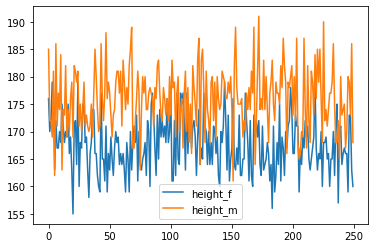

In [2939]:
gym.plot()

#### Different histograms:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014512B6CA00>]],
      dtype=object)

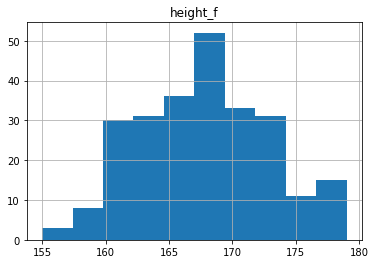

In [2940]:
gym.hist('height_f')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001450AB998E0>,
      dtype=object)

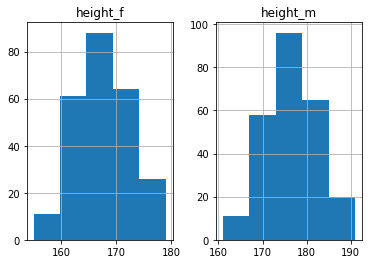

In [2941]:
gym.hist(bins=5)

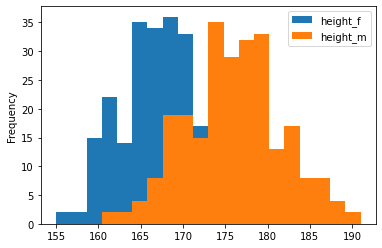

In [2942]:
gym.plot.hist(bins=20)

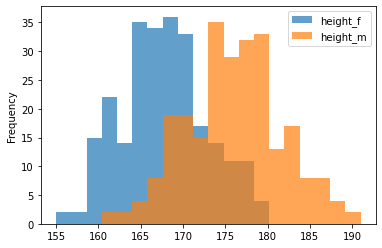

In [2943]:
gym.plot.hist(bins=20, alpha=0.7)

Note: this is not a histogram. This is a barplot:

לשנות שם של עמודה בgroupby

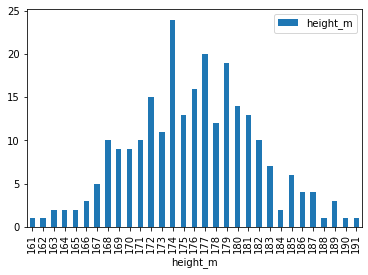

In [2944]:
gym.groupby('height_m')[['height_m']].count().plot.bar()

---
#### Back to our vaccinations data:

In [2945]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


#### Look at data for different countries
#### Use `groupby()` to group accoding to location

Group according to something + some columns + some summary statistic

Attempt #1 - what is wrong?

In [2946]:
vacc_df.groupby('location')[['total_vaccinations']].max()

,total_vaccinations
location,
Afghanistan,6.412950e+05
Africa,3.971932e+07
Albania,8.165560e+05
Algeria,2.500000e+06
Andorra,4.147300e+04
...,...
Wallis and Futuna,8.564000e+03
World,2.255071e+09
Yemen,1.962340e+05


Attempt #3 - change the 0 from string to int, and finally, it works :-)

In [2947]:
vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Afghanistan,6.412950e+05,13921.0,158343.0,0.41
Africa,3.971932e+07,965764.0,10328300.0,0.77
Albania,8.165560e+05,17565.0,320532.0,11.14
Algeria,2.500000e+06,22664.0,0.0,0.00
Andorra,4.147300e+04,1182.0,10938.0,14.16
...,...,...,...,...
Wallis and Futuna,8.564000e+03,343.0,4119.0,36.63
World,2.255071e+09,36025088.0,480259387.0,6.16
Yemen,1.962340e+05,10240.0,0.0,0.00


#### The `world` row shouldn't be there. Remove it using `.drop()` and `.index() :

In [2948]:
vacc_df.drop(vacc_df.loc[vacc_df.location == 'World'].index, inplace = True)

In [2949]:
vacc_df.drop(vacc_df.loc[vacc_df.location == 'World'].index)
vacc_df[vacc_df['location']=='world']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million


---
#### Your turn:
>What do you think `.index` does? Why is it there? How can you find out?
---

Before we continue, just assign this long row to a new dataframe, will be easier

In [2950]:
grouped_df = vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max().copy()
grouped_df.tail()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Wales,3482159.0,33151.0,1291699.0,40.97
Wallis and Futuna,8564.0,343.0,4119.0,36.63
Yemen,196234.0,10240.0,0.0,0.00
Zambia,147115.0,5680.0,5286.0,0.03
Zimbabwe,1083983.0,22863.0,394063.0,2.65


#### sort the values using 'sort_values()`

In [2951]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred', ascending = False).head(3)

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Gibraltar,77753.0,1068.0,38635.0,114.67
Seychelles,136526.0,2401.0,65873.0,66.98
San Marino,43192.0,725.0,21580.0,63.59


#### Histogram according to all values:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014512B53E20>,
      dtype=object)

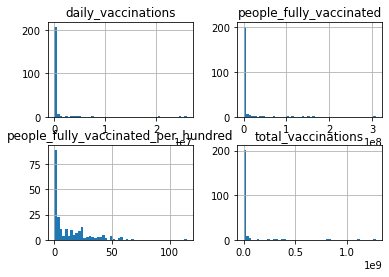

In [2952]:
grouped_df.hist(bins=50)

#### Histogram according to people_fully_vaccinated_per_hundred

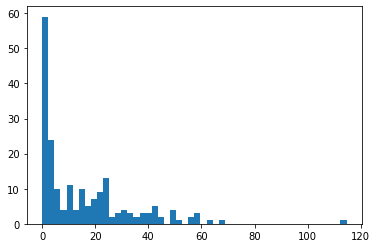

In [2985]:
plt.hist(grouped_df['people_fully_vaccinated_per_hundred'],bins=50)
plt.show()

#### Remove rows with 0's

Note that this is different than changing values to 0's

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145120EA1C0>]],
      dtype=object)

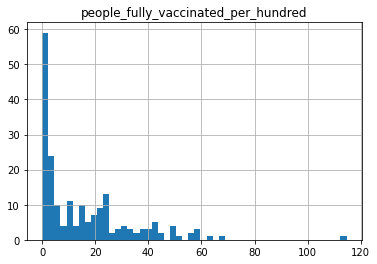

In [2956]:
grouped_df.drop(grouped_df[grouped_df.people_fully_vaccinated_per_hundred == 0.0].index, inplace=True)
#grouped_df
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

---
>### Functions covered in this unit:
>
> `std()` - standard deviation
>
> `.hist(data, num_bins)` - the data and the number of bins 
>
> `.plot()` - simple line plot
>
> `.hist(data, num_bins, alpha)` - the data, the number of bins and the transparency (default is 10 bins, all data and not transparent)
>
> `.plot.hist()` - histograms on same chart
>
> `.groupby()` - group according to the columns specified
>
> `.drop()` - removes unwanted rows or columns
>
> `.index()` - index of the selected rows
>
> `sort_values()` - self explantory.. it just sorts values
>
---

### 2. Standard deviation

An small example showing that the more the data is spread, the higher the std:

In [2957]:
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89],
                   'age': [20,20,20]})
df

,height,weight,age
0,161,67,20
1,156,65,20
2,172,89,20


In [2958]:
df.mean()

height    163.000000
weight     73.666667
age        20.000000
dtype: float64

In [2959]:
df.std()

height     8.185353
weight    13.316656
age        0.000000
dtype: float64

<a id='section2'></a>

### 3. Boxplots

In [2960]:
np.random.seed(2345)
df = pd.DataFrame(np.random.randn(5,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
0,-0.951299,1.768772,-1.141827,0.710755
1,0.510951,1.149029,-0.538460,-0.736645
2,-0.075996,0.848818,0.649783,-0.571212
3,-0.914158,-0.123520,0.281634,0.795612
4,0.179394,1.202007,0.371815,-0.290084


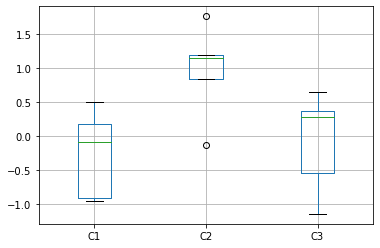

In [2961]:
boxplot = df.boxplot(column=['C1', 'C2', 'C3'])

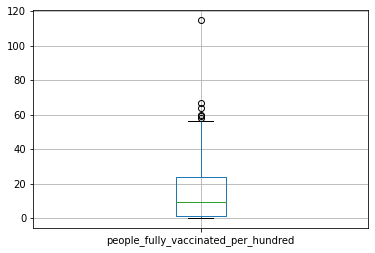

In [2962]:
grouped_df.boxplot('people_fully_vaccinated_per_hundred')

In [2963]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred')


,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Uganda,748676.0,21822.0,4129.0,0.01
Lesotho,36759.0,666.0,122.0,0.01
Malawi,367356.0,13108.0,2100.0,0.01
Central African Republic,26541.0,1017.0,990.0,0.02
Zambia,147115.0,5680.0,5286.0,0.03
...,...,...,...,...
Israel,10613140.0,184945.0,5141453.0,59.40
Cayman Islands,86711.0,1024.0,39090.0,59.48
San Marino,43192.0,725.0,21580.0,63.59


# Correlations
# Unit 5
1. [Correlation computation and scatterplots](#section1)
2. [Scatterplot matrix](#section2)
3. [Heatmaps](#section3)

In [2964]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/housing.csv'
house_df = pd.read_csv(url)
house_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<a id='section1'></a>

### 1. Correlation computation and scatterplots

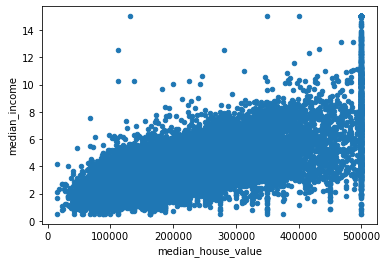

In [2965]:
house_df.plot.scatter(x = 'median_house_value', y = 'median_income')

In [2966]:
house_df[['median_income', 'median_house_value']].corr(method='pearson')

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


In [2967]:
house_df.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


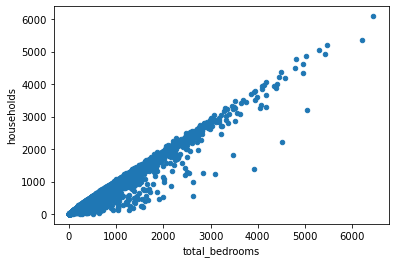

In [2968]:
house_df.plot.scatter(x = 'total_bedrooms', y = 'households')

##### Almost similar - using matplotlib plt function:

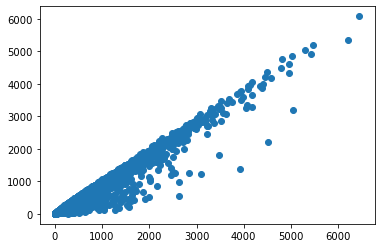

In [2969]:
plt.scatter(house_df['total_bedrooms'], house_df['households'])

##### Using seaborn:

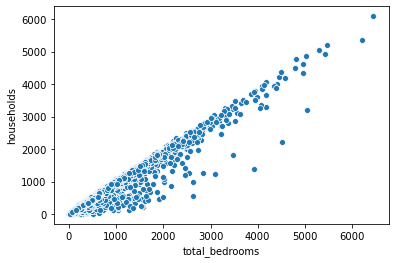

In [2970]:
sns.scatterplot(data=house_df, x='total_bedrooms', y='households')

##### using seaborn with a regression line:

#### Scatterplots work when there are missing data

In [2971]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 3, np.nan, 8, 3, 18, 25])
example_df = pd.DataFrame({'x': x, 'y': y})
example_df

,x,y
0,10,2.0
1,11,1.0
2,12,3.0
3,13,NaN
4,14,8.0
5,15,3.0
6,16,18.0
7,17,25.0
8,18,NaN
9,19,NaN


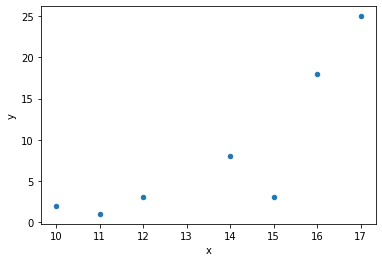

In [2972]:
example_df.plot.scatter(x = 'x', y = 'y')

In [2973]:
example_df.corr(method='pearson') 

,x,y
x,1.000000,0.831833
y,0.831833,1.000000


In [2974]:
example_df.corr(method='spearman') 

,x,y
x,1.000000,0.900937
y,0.900937,1.000000


In [2975]:
example_df.corr(method='kendall') 

,x,y
x,1.00000,0.78072
y,0.78072,1.00000


<a id='section2'></a>

### 2. Scatterplot matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145120DB3A0>,
      dtype=object)

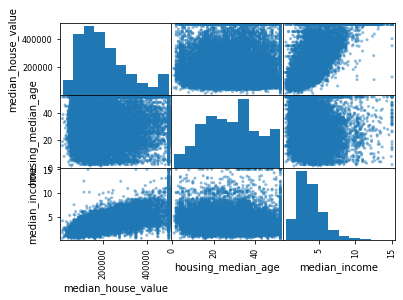

In [2976]:
features = ['median_house_value', 'housing_median_age',
            'median_income']
pd.plotting.scatter_matrix(house_df[features])

In [2977]:
features

['median_house_value', 'housing_median_age', 'median_income']

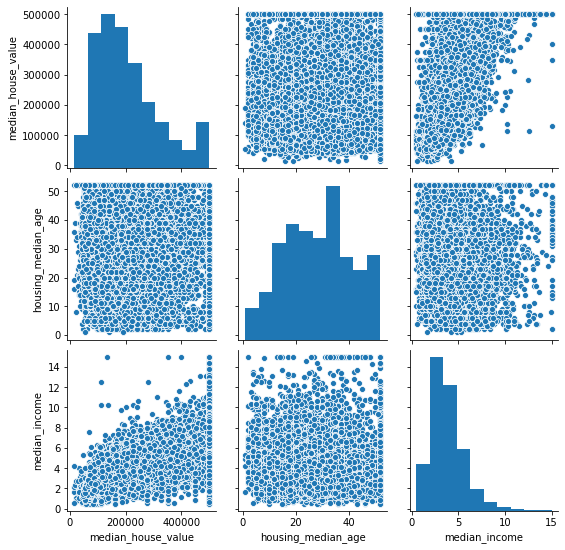

In [2978]:
#sns.set()
sns.pairplot(house_df[features], height = 2.5)

<a id='section3'></a>

### 3. Heatmaps

##### Pandas doesn't contain a built-in heatmap function. We can try and create one by adding color to corr:

In [2979]:
correlation_matrix = house_df[features].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,median_house_value,housing_median_age,median_income
median_house_value,1.000000,0.105623,0.688075
housing_median_age,0.105623,1.000000,-0.119034
median_income,0.688075,-0.119034,1.000000


In [2980]:
correlation_matrix.style.background_gradient(cmap='Blues')

,median_house_value,housing_median_age,median_income
median_house_value,1.000000,0.105623,0.688075
housing_median_age,0.105623,1.000000,-0.119034
median_income,0.688075,-0.119034,1.000000


##### Or we can use seaborn

,median_house_value,housing_median_age,median_income,total_bedrooms,population
median_house_value,1.00,0.11,0.69,0.05,-0.02
housing_median_age,0.11,1.00,-0.12,-0.32,-0.30
median_income,0.69,-0.12,1.00,-0.01,0.00
total_bedrooms,0.05,-0.32,-0.01,1.00,0.88
population,-0.02,-0.30,0.00,0.88,1.00


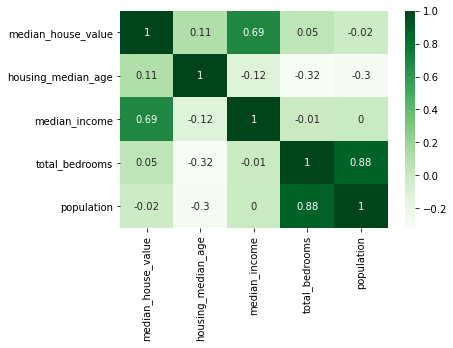

In [2982]:
features = ['median_house_value', 'housing_median_age','median_income','total_bedrooms','population']
correlation_matrix = house_df[features].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)
correlation_matrix

---
> ##### Summary
>
>* `.corr` - compute pairwise correlation of columns, excluding NA/null values. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
>
>* `.corr.style.background_gradient` - change the background color. [various options](corr.style.background_gradient)
>
>* `.plotting.scatter_matrix` - draw a matrix of scatter plots. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix)
>
>* `.plot.scatter` - plot a scatter plot
>
> Seaborn package:
>
>* `sns.scatterplot` - a scatter plot
>
>* `sns.regplot` - a scatter plot with a regression line
>
>* `sns.pairplot` - scatter plot matrix
>
> * `sns.heatmap` - a heatmap. @annot = True to print the values inside the square
>
---

# unit 6 EDA example - Marketing analytics

1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Outliers](#section1.3)
   1.4 [Transformations](section1.4)
  
2. [Understand the data](#section2)
3. [Correlations](#section3)

In [3001]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/marketing_data.csv'
mrkt_df = pd.read_csv(url)
mrkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


---
### 1. Wrangling data



<a id='section1.1'></a>

#### 1.1 Fix columns

So here is the problem: the 'Income' column contains extra whitespace, clean it:

In [3002]:
mrkt_df.columns = mrkt_df.columns.str.replace(' ', '')

And: the 'Income' column should be turned to numeric (float is better)

In [3003]:
# transform Income column to a numerical
mrkt_df['Income'] = mrkt_df['Income'].str.replace('$', '')
mrkt_df['Income'] = mrkt_df['Income'].str.replace(',', '').astype('float')
mrkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


Check that our changes worked:

In [2995]:
mrkt_df.dtypes['Income']

dtype('float64')

Change the date column to a date type

דייט טיימ על עמודה שלמה

In [2996]:
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'])

<a id='section1.2'></a>

#### 1.2 Missing values

In [3004]:
mrkt_df.isnull().sum().sort_values(ascending=False)

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

The feature Income contains 24 null values

Plot this feature to identify best strategy for imputation



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014512707F10>]],
      dtype=object)

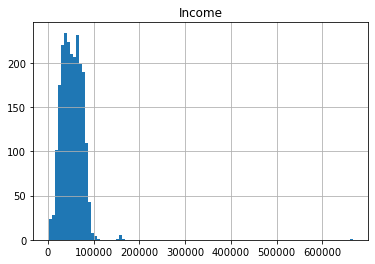

In [3005]:
mrkt_df.hist('Income',bins=100)

Try more bins to get a better idea:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001451BE229A0>]],
      dtype=object)

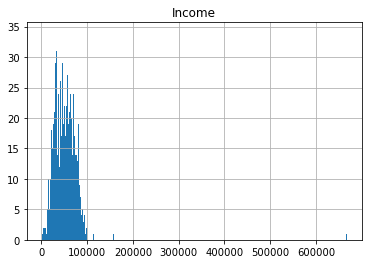

In [3007]:
mrkt_df.hist('Income',bins=1000)

בוקספלוט דרך ארחרת

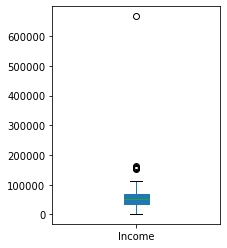

In [3008]:
mrkt_df['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

Findings:

Most incomes are distributed between $0-\$100,000, with a few outliers

Replace null values with median value, to avoid effects of outliers on imputation value

In [3010]:
mrkt_df['Income'] = mrkt_df['Income'].fillna(mrkt_df['Income'].median())

<a id='section1.3'></a>

#### 1.3 Noisy data - outliers

Plot only numeric columns, that are not binary or an ID:

לבחור סוג ספציפי של משתנה

In [ ]:
#remove binary and ID
df_to_plot = mrkt_df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'])

#numeric
df_to_plot = df_to_plot.select_dtypes(include=np.number)


ליצור מספר פלוטים

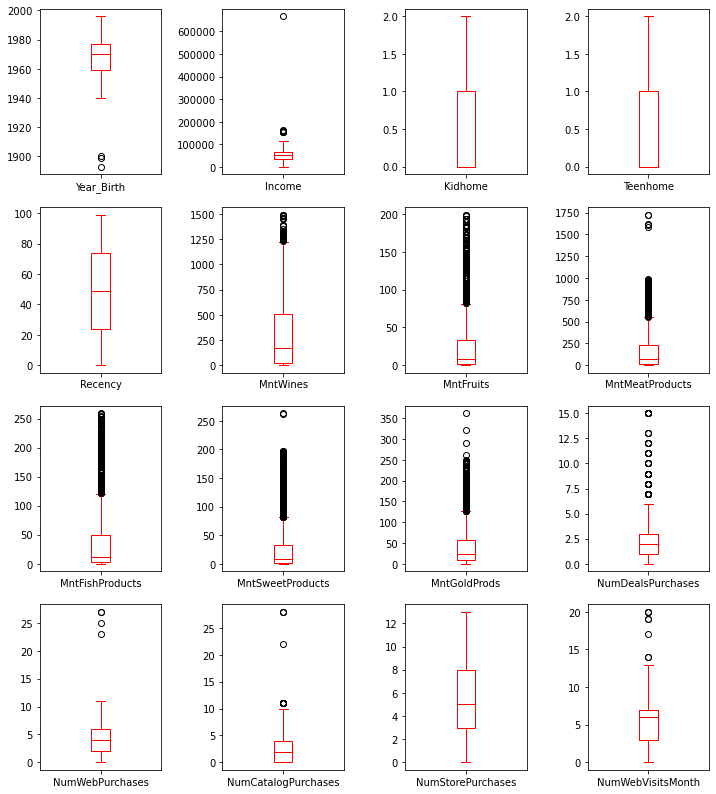

In [3032]:
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=False,color = 'red')
plt.subplots_adjust(wspace=0.5)

Findings: 

Multiple features contain outliers (see boxplots), but the only that likely indicate data entry errors are Year_Birth <= 1900

Remove people born before 1900: 

מחיקת עמודות

In [3033]:
mrkt_df = mrkt_df[mrkt_df['Year_Birth'] > 1900].reset_index(drop=True)

Check:

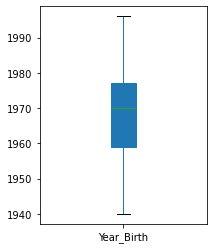

In [3034]:
plt.figure(figsize=(3,4))
mrkt_df['Year_Birth'].plot(kind='box', patch_artist=True);

You can also plot via pandas:

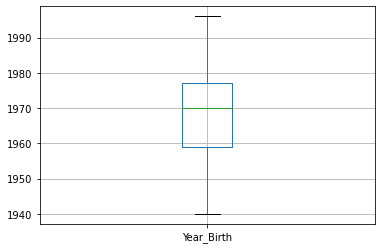

In [3035]:
mrkt_df.boxplot('Year_Birth')

<a id='section1.1'></a>

#### 1.4 Transformations

Transform the date to a datetime object:

In [3036]:
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'])

<a id='section2'></a>

### 2. Understand the data

The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'

עמודות חדשות

In [3037]:
mrkt_df['Dependents'] = mrkt_df['Kidhome'] + mrkt_df['Teenhome']

The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'

In [3038]:
mrkt_df['Year_Customer'] = pd.DatetimeIndex(mrkt_df['Dt_Customer']).year

The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'

We will use [list comprehension](https://docs.python.org/3.4/tutorial/datastructures.html#list-comprehensions) to do that 

A list comprehension consists of brackets containing an expression followed by a for clause, then zero or more for or if clauses. 

In [3039]:
squares = []
for x in range(10):
    squares.append(x**2)
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [3041]:
squares = [x**2 for x in range(10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [3042]:
mnt_cols = [col for col in mrkt_df.columns if 'Mnt' in col]
mnt_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

We have used `.sum()` to sum by columns. Now we want to sum rows. So `axis=1`

In [3043]:
mrkt_df['TotalMnt'] = mrkt_df[mnt_cols].sum(axis=1)

The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'

In [3044]:
purchases_cols = [col for col in mrkt_df.columns if 'Purchases' in col]
mrkt_df['TotalPurchases'] = mrkt_df[purchases_cols].sum(axis=1)

The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [3045]:
campaigns_cols = [col for col in mrkt_df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
mrkt_df['TotalCampaignsAcc'] = mrkt_df[campaigns_cols].sum(axis=1)

In [3046]:
mrkt_df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


<a id='section3'></a>

### 3. Correlations - patterns in the data

To find patterns in the data, we need to find correlations in the data

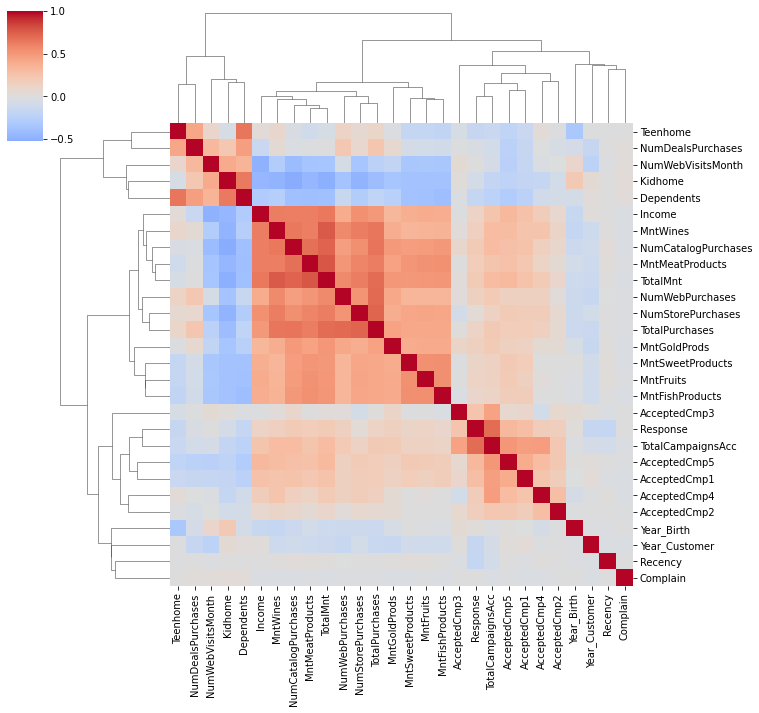

In [3047]:
# calculate correlation matrix
## using non-parametric test of correlation (kendall), since some features are binary
corrs = mrkt_df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

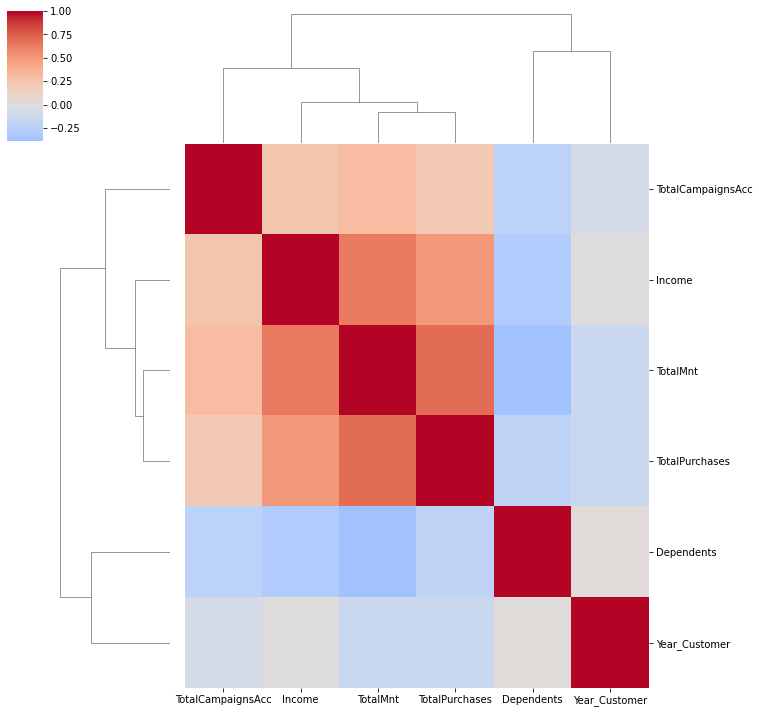

In [3048]:
corrs = mrkt_df[['Income', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

Plot illustrating the effect of high income on spending:

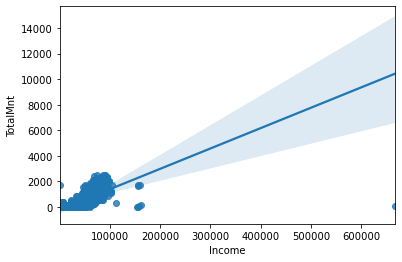

In [3050]:
sns.regplot(x='Income', y='TotalMnt', data=mrkt_df)

the same, but remove the outliers:

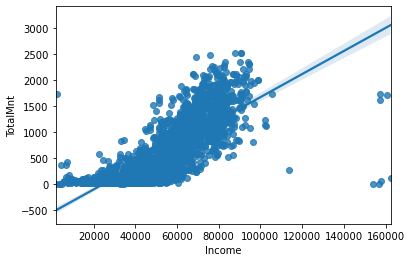

In [3052]:
sns.regplot(x='Income', y='TotalMnt', data=mrkt_df[mrkt_df['Income'] < 200000])

Plot illustrating negative effect of having dependents (kids & teens) on spending:
    
A linear plot doesn't look good here since data is discrete (same for ordinal data - e.g. - none, few, many)

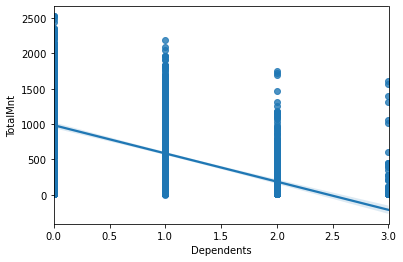

In [3053]:
sns.regplot(x='Dependents', y='TotalMnt', data=mrkt_df);

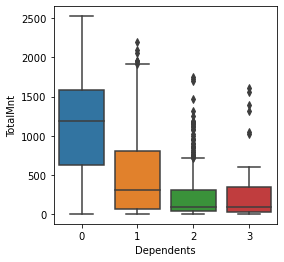

In [3054]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=mrkt_df);

Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

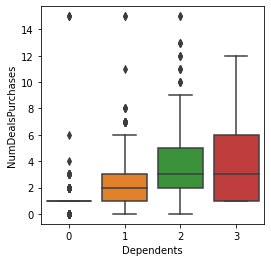

In [3055]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=mrkt_df);

Plots illustrating the positive effect of income 

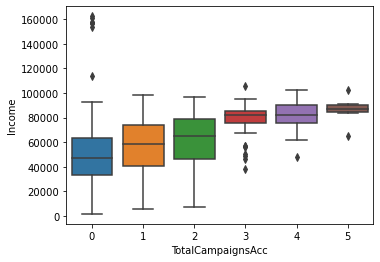

In [3056]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=mrkt_df[mrkt_df['Income']<200000]);

Number of web visits in the last month is not positively correlated with number of web purchases

Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

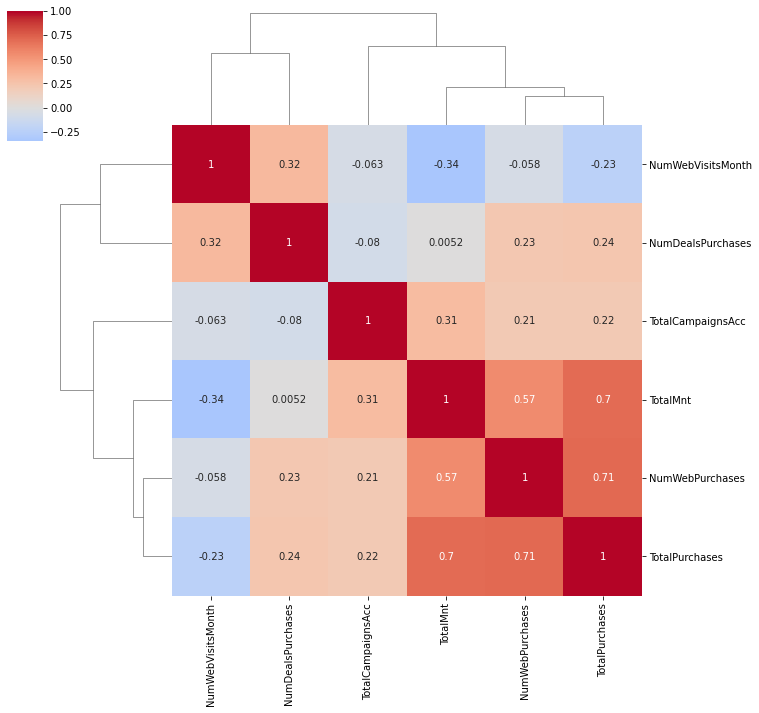

In [3066]:
corrs = mrkt_df[['NumWebVisitsMonth', 'NumWebPurchases', 'NumDealsPurchases', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0,  annot=False)

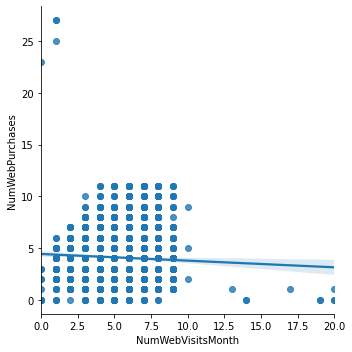

In [3068]:
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=mrkt_df)

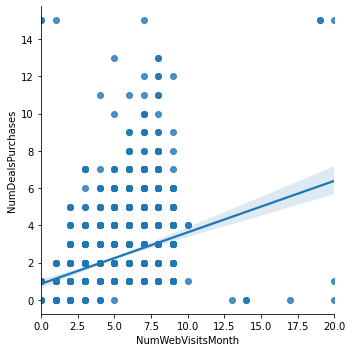

In [3069]:
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=mrkt_df)

---
> A summary of new functions:
>
>* `.drop()` - remove labels or columns [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop)
>
>* `.str.replace('x','y')` - replace string x with string y
>
>* `.reset_index(drop=true)` - resets the index. As defult, the old index is added as a column. Use drop=True to avoid this. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
>
>* `plot` - a matplotlib function
>
>* `plt.subplots_adjust` - a matplotlib function. adjusts space between the plots. [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)
>
>* `sum(axis=1)` - sums the values according to the rows, instead of the default sum by columns
>
>* create a list using [list comprehension](https://docs.python.org/3.4/tutorial/datastructures.html#list-comprehensions) - "do something for data in dataframe if condition holds"


---

# Decision trees 
# unit 7
1. [EDA - exploratory data analysis](#section1)
2. [Build a model](#section2)

    2.1 [Define](#section2.1)    
    2.2 [Fit](#section2.2)    
    2.3 [Predict](#section2.3)    
    2.4 [Evalaute](#section2.4)

3. [Select informative attributes](#section3)

    3.1 [Petal vs. Sepal](#section3.1) 

4. [Overfitting and Underfitting](#section4)


In [3070]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<a id='section1'></a>

## 1. EDA

In [3071]:
pd.pivot_table(iris_df,index=['class'],values=['sepal_length','sepal_width','petal_length','petal_width'])

,petal_length,petal_width,sepal_length,sepal_width
class,,,,
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


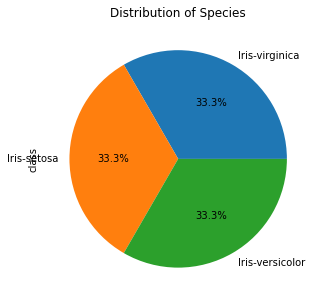

In [3074]:
plt.figure(1, figsize=(5,5))
plt.title("Distribution of Species")
iris_df['class'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

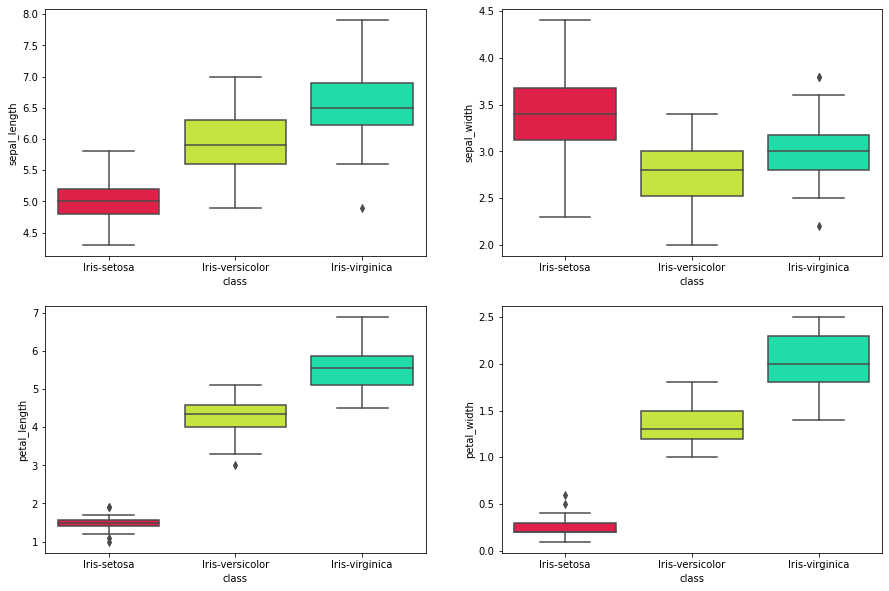

In [3079]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'class', y = 'sepal_length', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,2)
sns.boxplot(x = 'class', y = 'sepal_width', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,3)
sns.boxplot(x = 'class', y = 'petal_length', data = iris_df, palette="gist_ncar_r")
plt.subplot(2,2,4)
sns.boxplot(x = 'class', y = 'petal_width', data = iris_df, palette="gist_ncar_r")
plt.show()

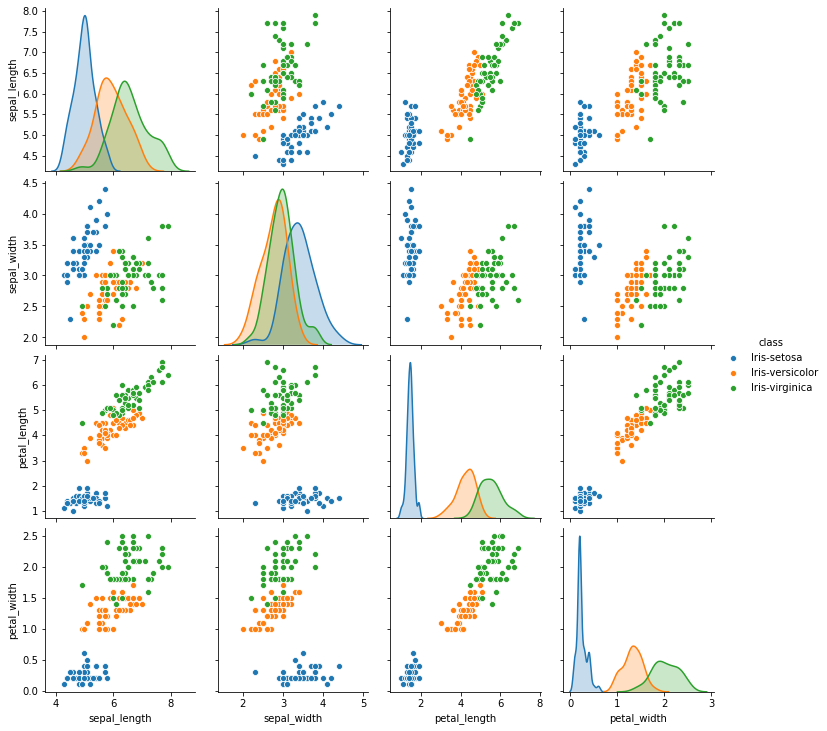

In [3075]:
sns.pairplot(iris_df, hue='class')
plt.show()

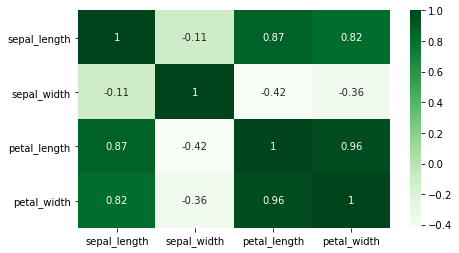

In [3076]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_df.corr(),annot=True,cmap='Greens') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

<a id='section2'></a>

## 2. Build a classification model

<a id='section2.1'></a>
### 2.1 Define the model: 
we will use a decision tree based on the gini index (gini index is the default)

In [3147]:
model1 = sk.tree.DecisionTreeClassifier(criterion="gini")

<a id='section2.2'></a>
### 2.2 Fit the model on the data:

Define what are the features (x) and what is the target (y)

In [3148]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']

Use the model we chose on the features we chose (X and y)

In [3149]:
model1.fit(X, y)

DecisionTreeClassifier()

now model1 is a tree, and it has tree features:

In [3083]:
type(model1)

sklearn.tree._classes.DecisionTreeClassifier

In [3151]:
model1.feature_importances_

array([0.01333333, 0.01333333, 0.55072262, 0.42261071])

Let's see what we got:

In [3085]:
text_representation = tree.export_text(model1)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



Vizualize:

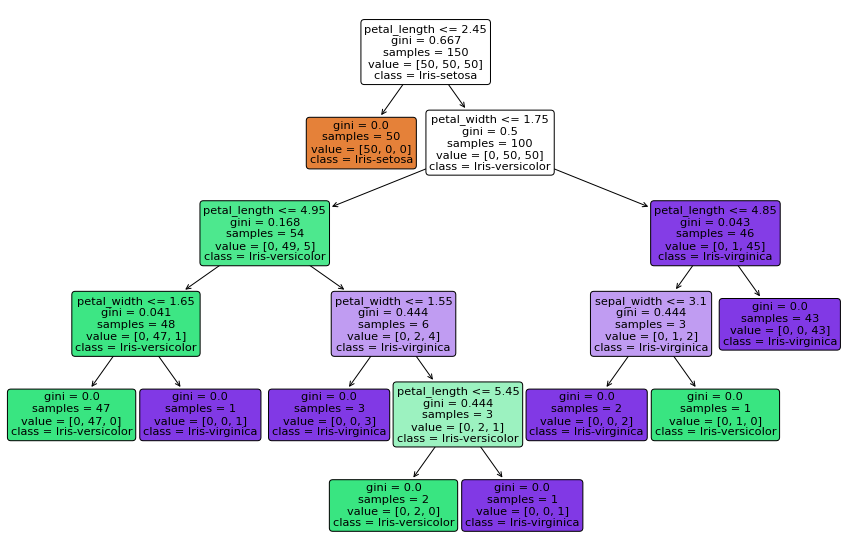

In [3086]:
fig = plt.figure(figsize=(15,10))

tree.plot_tree(model1, 
               feature_names = features, 
               class_names = model1.classes_,
               filled=True, 
               rounded = True)  
plt.show()

That's nice. But how well will it predict on new data?

<a id='section2.3'></a>
### 2.3 Predict

##### Split the data to 70% train set and 30% test

In [3152]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [3153]:
X_train.head(2)

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3


In [3154]:
X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1


In [3155]:
y_test.head(2)

14        Iris-setosa
98    Iris-versicolor
Name: class, dtype: object

##### Use the training data to train the model (a new model - model2)

In [3158]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

##### Finally - predict:

In [3159]:
prediction2 = model2.predict(X_test)
prediction2 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

present in a nicer format:

In [3093]:
df = pd.DataFrame(columns = ['class', 'predictions'])

In [3094]:
df['class'] = y_test
df = df.reset_index(drop=True)

In [3095]:
df['predictions'] = pd.Series(prediction2)
df.head()

,class,predictions
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica


<a id='section2.4'></a>
### 2.4 Evaluate

There are various ways to measure accuracy:

The most obvious - (number of correct)/(total)  

In [3096]:
sk.metrics.accuracy_score(prediction2, y_test)

0.9555555555555556

A truth table

In [3097]:
sk.metrics.confusion_matrix(y_test, prediction2)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

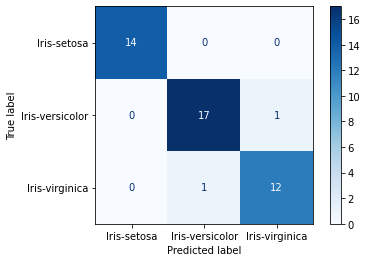

In [3098]:
sk.metrics.plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)

Precision, Recall and F1 score - most common. But out of scope for this course

In [3099]:
print(sk.metrics.classification_report(y_test, prediction2, target_names=model2.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



<a id='section3'></a>
## 3. Feature importance

Which attributes are the most important?

In [3100]:
model1.feature_importances_

array([0.        , 0.01333333, 0.56405596, 0.42261071])

organize it in a nicer format:

In [3101]:
feature_importances = pd.DataFrame(model2.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_length,0.571965
petal_width,0.385096
sepal_length,0.021469
sepal_width,0.021469


<a id='section3.1'></a>
### 3.1 Petal vs. Sepal 

We see that petal is most important. What happens if we only use sepal?

In [3102]:
X_s = iris_df[['sepal_length','sepal_width']]
y_s = iris_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s)) 

The accuracy of the Decision Tree is 0.6


In [3103]:
df2 = pd.DataFrame(columns = ['class', 'predictions'])
df2['class'] = y_test_s
df2 = df2.reset_index(drop=True)
df2['predictions'] = pd.Series(prediction_s) 

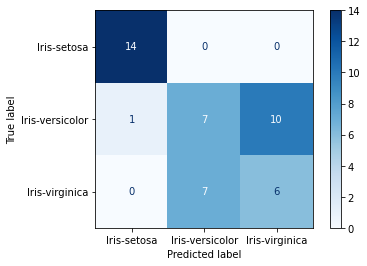

In [3104]:
sk.metrics.plot_confusion_matrix(model_s, X_test_s, y_test_s, cmap=plt.cm.Blues)

In [3105]:
#mixed_df = iris_df[['sepal_length','petal_width','class']]
X_m = iris_df[['sepal_length','petal_width']]
y_m = iris_df['class']
X_train_m, X_test_m, y_train_m, y_test_m = sk.model_selection.train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
model_mix = sk.tree.DecisionTreeClassifier(criterion="gini")
model_mix.fit(X_train_m,y_train_m)
prediction_mix = model_mix.predict(X_test_m)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_mix, y_test_m))

The accuracy of the Decision Tree is 0.9555555555555556


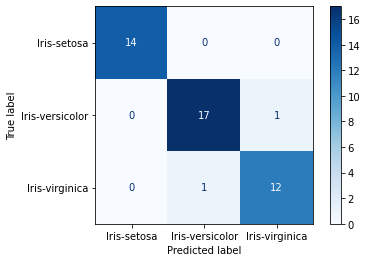

In [3106]:
sk.metrics.plot_confusion_matrix(model_mix, X_test_m, y_test_m, cmap=plt.cm.Blues)

<a id='section4'></a>
## 4. Overfitting and underfitting

In [3107]:
def get_acc(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

In [3108]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']

In [3109]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [3110]:
for max_leaf_nodes in [2, 4, 6, 8, 10]:
    my_acc = get_acc(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(max_leaf_nodes, my_acc)

2 0.6
4 0.9555555555555556
6 0.9555555555555556
8 0.9555555555555556
10 0.9555555555555556


---
> Terminology:
>
>* features - attributes
>
>* class/target - the feature we want to predict
>
>* [A guide to trees - scikit-learn](https://scikit-learn.org/stable/modules/tree.html)
>
> A summary of new functions:
>
>* `plot.pie(autopct="%1.1f%%")` - a pie plot. autopct adds percentages to each of the slices of the pie chart, 1.1 - percentages with 1 number after the decimal dot.
>
>* [DecisionTreeClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
>
>* `my_model = sk.tree.DecisionTreeClassifier(criterion="gini")` - decision tree model with the gini index as the node splitting criterion
>
>* `my_model.fit(X, y)` - train the model. X are the features and y is the target/class.
>
>* `my_model.feature_importances_` - shows how important is each of the features in model `my_model`
>
>* `sk.model_selection.train_test_split` - splits the data to train and test
>
>* `tree.export_text(my_model)` - shows the tree of the model in text format. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html)
>
>* `tree.plot_tree` - plots a nice decision tree. [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)
>
>* [Metrics documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)
>
>* `sk.metrics.accuracy_score` - computes the model's jaccard accuracy score
>
>* `sk.metrics.confusion_matrix` - a truth table
>
>* `sk.metrics.plot_confusion_matrix` - a confusion matrix
>
> 
---

# Building models - part 2
# unit 9

1. [SVM model - linear classification](#section1)
2. [Decision trees - non linear classfication](#section2)

    2.1 [Overfitting - prune max depth](#section2.1)    
    2.2 [Overfitting - prune max depth for another dataset](#section2.2)    
    2.3 [Overfitting - use random forest](#section2.3)    

3. [Accuracy](#section3) 

4. [Feature importance](#section4)

    4.1 [Petal vs. Sepal](#section4.1) 


<a id='section1'></a>
# 1. SVM model - linear classification

Load the data

In [16]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Prepare the data - split the data to training data and test data:

In [3112]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

Define, fit, predict, evaluate

In [3113]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.9777777777777777

<a id='section2'></a>
# 2. Decision trees - nonlinear classification

Reminder: the model

In [3114]:
from sklearn import tree
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.9555555555555556

<a id='section2.1'></a>

## 2.1. Overfitting - prune max depth

Check the accuracy with different limits 

Organize the data - split to train and test

Define a function that builds a model according to a given tree depth, and returns it's accuracy

In [3115]:
def get_acc(max_depth, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

examine differen number of leaves:

In [3116]:
for max_depth in [1, 2, 3]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.6
2 0.9555555555555556
3 0.9555555555555556


<a id='section2.2'></a>

## 2.2. Overfitting - prune max depth for another dataset

Load the data

In [3117]:
from sklearn.datasets import load_digits
data = load_digits()

Prepare and split:

In [3118]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Use the function of max depth:

In [3119]:
for max_depth in [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.1925925925925926
2 0.3148148148148148
3 0.45925925925925926
4 0.575925925925926
5 0.6888888888888889
6 0.7814814814814814
7 0.8333333333333334
8 0.8518518518518519
9 0.8574074074074074
10 0.8555555555555555
11 0.8555555555555555
12 0.8574074074074074
13 0.8611111111111112
14 0.8611111111111112
15 0.8592592592592593
20 0.8592592592592593
25 0.8592592592592593


<a id='section2.3'></a>
## 2.3 Overfitting - use random forest

In [3120]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=9, random_state=0, criterion="gini")
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)
acc = sk.metrics.accuracy_score(predrf, y_test)
acc

0.9722222222222222

<a id='section3'></a>
# 3. Accuracy

In [3121]:
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [3122]:
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.9555555555555556

Evaluation metric: a truth table

In [3123]:
sk.metrics.confusion_matrix(y_test, pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

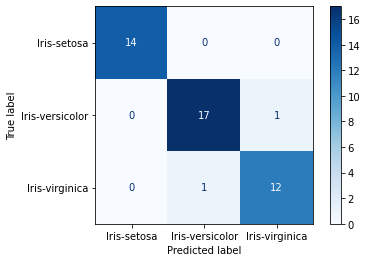

In [3124]:
sk.metrics.plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)

Precision, Recall and F1 score - most common. But out of scope for this course

In [3125]:

print(sk.metrics.classification_report(y_test, pred, target_names=dt.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



<a id='section4'></a>
# 4. Feature importance

Which attributes were the most important in the training data?

In [3126]:
dt.feature_importances_

array([0.02146947, 0.02146947, 0.06316954, 0.89389153])

organize it in a nicer format:

In [3127]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_width,0.893892
petal_length,0.063170
sepal_length,0.021469
sepal_width,0.021469


<a id='section4.1'></a>
### 4.1 Petal vs. Sepal 

We see that petal is most important. What happens if we only use sepal?

In [3128]:
X_s = iris_df[['sepal_length','sepal_width']]
y_s = iris_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s)) 

The accuracy of the Decision Tree is 0.6222222222222222


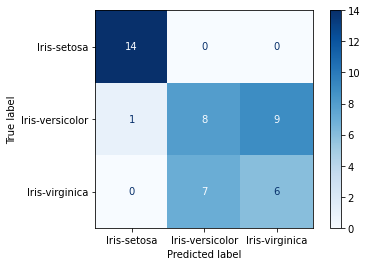

In [3129]:
sk.metrics.plot_confusion_matrix(model_s, X_test_s, y_test_s, cmap=plt.cm.Blues)

In [3130]:
df2 = pd.DataFrame(columns = ['class', 'predictions'])
df2['class'] = y_test_s
df2 = df2.reset_index(drop=True)
df2['predictions'] = pd.Series(prediction_s) 

Now let's try a model with two features: one sepal and one petal:

In [3131]:
X_m = iris_df[['sepal_length','petal_width']]
y_m = iris_df['class']
X_train_m, X_test_m, y_train_m, y_test_m = sk.model_selection.train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
model_mix = sk.tree.DecisionTreeClassifier(criterion="gini", random_state=1)
model_mix.fit(X_train_m,y_train_m)
prediction_mix = model_mix.predict(X_test_m)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_mix, y_test_m))

The accuracy of the Decision Tree is 0.9555555555555556


# Visualization principles
# unit 9
1. Log scale
2. Jitter
3. Set the scale
4. Text on plot


## Plotting binary variables

Not directly connected to today's lesson. But many of you asked.
Let look at a case were we have 2 binary variables: 'sex' and 'survived'

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Use a barplot (two variables) or a countplot (one variable)

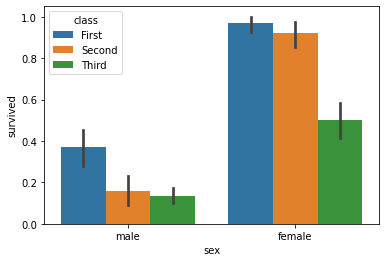

In [3]:
sns.barplot(x="sex", y="survived", hue="class",  data=titanic)
plt.show()

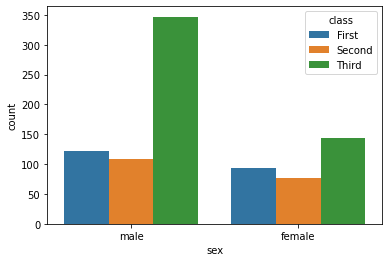

In [4]:
sns.countplot(x="sex", hue="class",  data=titanic)
plt.show()

Or use a catplot for categorical data:

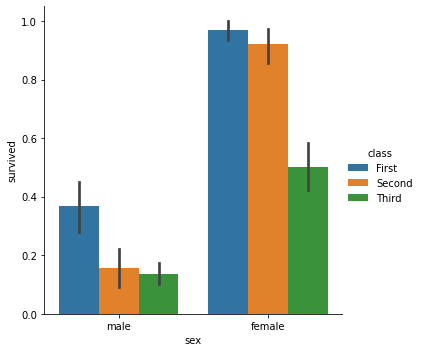

In [5]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

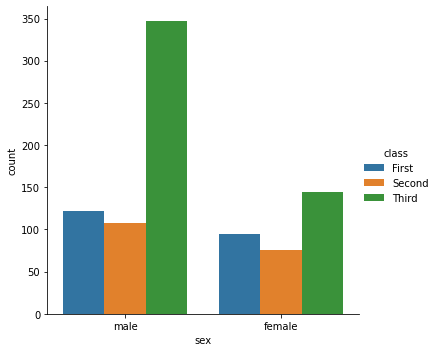

In [6]:
sns.catplot(x="sex", hue="class", kind="count", data=titanic)
plt.show()

## Log scale

In [9]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
sns.histplot(diamonds.price[diamonds.cut == 'Ideal'])

AttributeError: module 'seaborn' has no attribute 'histplot'

##### One option:

In [11]:
sns.histplot(diamonds.price[diamonds.cut == 'Ideal'], log_scale = True)

AttributeError: module 'seaborn' has no attribute 'histplot'

##### Another option:

In [12]:
sns.histplot(np.log2(diamonds.price[diamonds.cut == 'Ideal']))

AttributeError: module 'seaborn' has no attribute 'histplot'

### Stack histogram:

In [13]:
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",   
)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [14]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="colorblind",
    edgecolor=".3",
    linewidth=.5, 
    log_scale = True
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.show()

AttributeError: module 'seaborn' has no attribute 'set_theme'

## Jitter in python

Google it: [Jitter in python](https://www.google.com/search?q=jitter+in+python&sxsrf=ALeKk01NFy18kBeX8CmyToZAT-l4YIlJeQ%3A1621252840686&ei=6FqiYPSmKYzdkwXckaGgCw&oq=jitter&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIFCAAQkQIyBQgAEMsBMgUIABDLATICCAAyAggAMgUIABDLATICCAAyAggAMgIIADoECAAQQzoFCAAQsQM6CAgAELEDEJECOggILhCxAxCDAToFCC4QsQM6BwgAEIcCEBQ6AgguUJ8gWIcuYJg1aAFwAngAgAGdAYgB1giSAQMwLjiYAQCgAQGqAQdnd3Mtd2l6wAEB&sclient=gws-wiz)

Documentation contains such a good example we'll just [follow it](https://seaborn.pydata.org/generated/seaborn.stripplot.html)

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

In [3140]:
sns.stripplot(x="day", y="total_bill", data=tips)

NameError: name 'tips' is not defined

Use a smaller amount of jitter:

In [3141]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

NameError: name 'tips' is not defined

Jitter plus a boxplot:

In [3142]:
ax = sns.boxplot(x="tip", y="day", data=tips)
ax = sns.stripplot(x="tip", y="day", data=tips, color=".3")

NameError: name 'tips' is not defined

## Set the scale

Google it: [set scale seaborn](https://www.google.com/search?q=set+scale+seaborn&sxsrf=ALeKk02NiH79RWrRRXIqusuG-vHfuyIm2A%3A1621254123926&ei=61-iYOiGOMyxkwWAiZjICQ&oq=set+scale+sea&gs_lcp=Cgdnd3Mtd2l6EAMYADIECCMQJzIGCAAQFhAeMgYIABAWEB4yBggAEBYQHjoHCCMQsAMQJzoHCAAQRxCwAzoCCAA6BQghEKABOggIABAIEA0QHlC8EVjyJmCULGgEcAJ4AIABogGIAbgHkgEDMC43mAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz)

##### One option:

In [3143]:
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)
ax.set(ylim=(0, 100))

NameError: name 'tips' is not defined

##### Another option:

NameError: name 'tips' is not defined

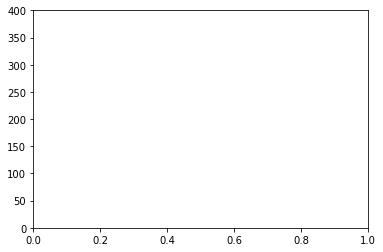

In [3144]:
plt.ylim(0, 400)
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

## Add labels onto the plot

Google it: [add text to plot seaborn](https://www.google.com/search?q=add+text+to+plot+seaborn&sxsrf=ALeKk01vym2w-SfYoAOBXBgUbDCr0I04Uw%3A1621255993821&ei=OWeiYObWMdCTkwXRoIngCw&oq=add+text+to+plot+seaborn&gs_lcp=Cgdnd3Mtd2l6EAMyAggAMgYIABAWEB4yBggAEBYQHjoHCCMQsAMQJzoHCAAQRxCwAzoECAAQQzoGCAAQBxAeUJAcWKgzYJs1aAFwAngAgAGeAYgBmgqSAQQwLjEwmAEAoAEBqgEHZ3dzLXdpesgBCcABAQ&sclient=gws-wiz&ved=0ahUKEwim1-ec4dDwAhXQyaQKHVFQArwQ4dUDCA4&uact=5_)

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

With a legend:

In [3145]:
ax = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = 'species', palette = 'colorblind')

NameError: name 'penguins' is not defined

Without a legend but with text:

In [3146]:

ax = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = 'species', palette = 'colorblind', legend=False)

style = dict(size=12, color='black')
ax.text(35, 15, "Adelie",  **style)
ax.text(55, 20, "Chinstrap",  **style)
ax.text(52, 14, "Gentoo",  **style)
plt.show()

NameError: name 'penguins' is not defined